# II. MovieLens 25M Dataset

**1. How many movies are released each year? What is the percentage of change over time?**

Number of Movies Released Each Year:
Release Year
1874       1
1878       1
1880       1
1883       1
1887       1
        ... 
2015    2513
2016    2488
2017    2374
2018    2034
2019     994
Name: count, Length: 135, dtype: int64

Percentage Change Over Time:
Release Year
1874          NaN
1878     0.000000
1880     0.000000
1883     0.000000
1887     0.000000
          ...    
2015     4.447215
2016    -0.994827
2017    -4.581994
2018   -14.321820
2019   -51.130777
Name: count, Length: 135, dtype: float64


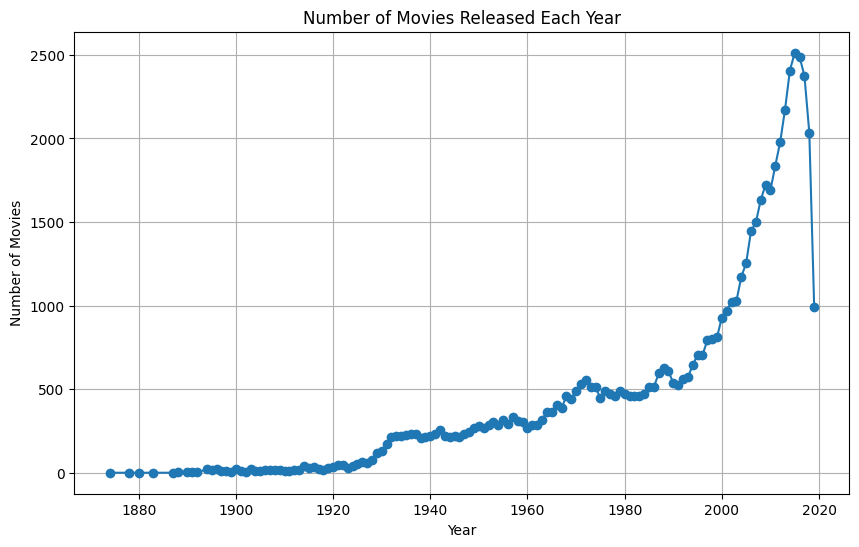


[Markdown output](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/movie_stats.md) and plot saved successfully.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/movies.csv")

df['Release Year'] = df['title'].str.extract(r'\((\d{4})\)')

df.dropna(subset=['Release Year'], inplace=True)

df['Release Year'] = df['Release Year'].astype(int)

movie_counts = df['Release Year'].value_counts().sort_index()

print("Number of Movies Released Each Year:")
print(movie_counts)

percentage_change = movie_counts.pct_change() * 100

print("\nPercentage Change Over Time:")
print(percentage_change)

markdown_output = "# Number of Movies Released Each Year\n\n"
markdown_output += "| Year | Number of Movies |\n"
markdown_output += "|------|------------------|\n"
for year, count in movie_counts.items():
    markdown_output += f"| {year} | {count} |\n"

markdown_output += "\n\n# Percentage Change Over Time\n\n"
markdown_output += "| Year | Percentage Change |\n"
markdown_output += "|------|-------------------|\n"
for year, change in percentage_change.items():
    markdown_output += f"| {year} | {change:.2f}% |\n"

with open("movie_stats.md", "w") as file:
    file.write(markdown_output)

plt.figure(figsize=(10, 6))
plt.plot(movie_counts.index, movie_counts.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.savefig('movie_counts_plot.png')
plt.show()

print("\n[Markdown output](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/movie_stats.md) and plot saved successfully.")

**2. What are the most popular genre of movies?**

[Genre analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/genre_stats.md) completed and Markdown output saved successfully.


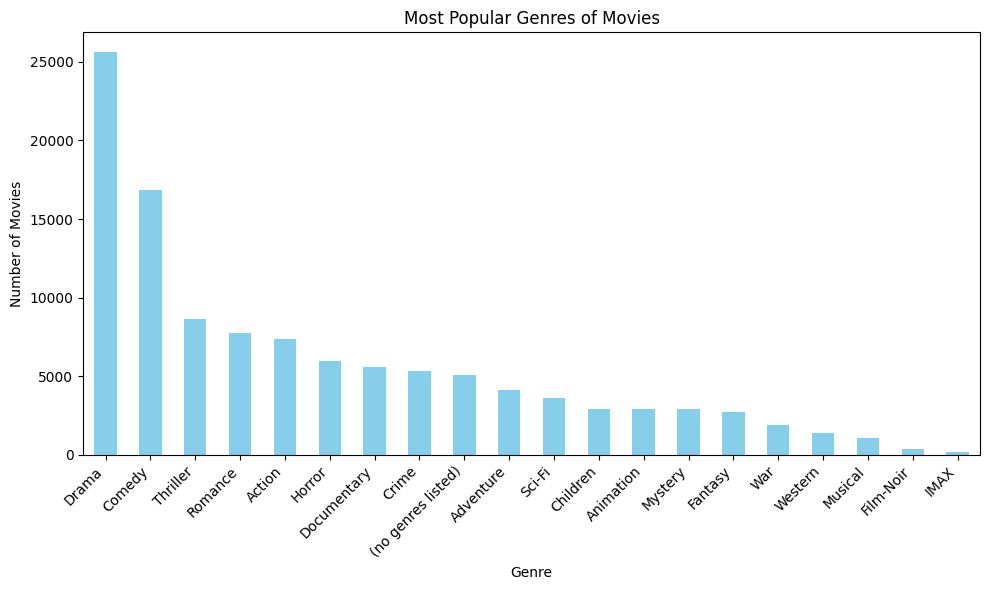

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/movies.csv")

genres_df = df['genres'].str.split('|', expand=True)

genre_counts = genres_df.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

markdown_output = "# Most Popular Genres of Movies\n\n"
markdown_output += "Here are the most popular genres of movies based on the analysis of the dataset:\n\n"

markdown_output += "1. **Top Genres**:\n"
for idx, (genre, count) in enumerate(genre_counts.items(), start=1):
    markdown_output += f"{idx}. {genre}: {count} movies\n"

markdown_output += "\n\n## Genre Popularity Chart\n\n"
markdown_output += "![Genre Popularity Chart](genre_popularity_chart.png)\n"

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Most Popular Genres of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('genre_popularity_chart.png')

with open("genre_stats.md", "w") as file:
    file.write(markdown_output)

print("[Genre analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/genre_stats.md) completed and Markdown output saved successfully.")

**3. Does the taste of movies changes over time?**

[Genre trends over time analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/genre_trends_over_time_analysis.md) completed. Markdown output saved successfully.


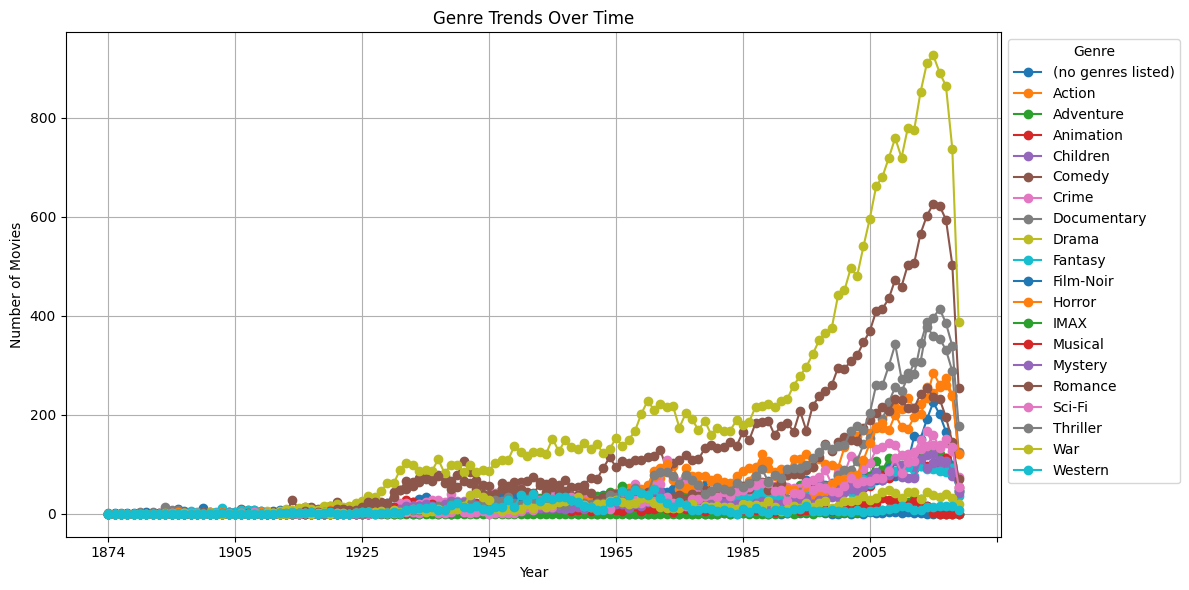

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/movies.csv")

df['Release Year'] = df['title'].str.extract(r'\((\d{4})\)')
df['Genres'] = df['genres'].str.split('|')

genre_counts_by_year = df.explode('Genres').groupby(['Release Year', 'Genres']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
genre_counts_by_year.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('genre_trends_over_time.png')

markdown_output = "# Genre Trends Over Time Analysis\n\n"
markdown_output += "Below is the genre trends over time analysis presented as a line chart.\n\n"
markdown_output += "![Genre Trends Over Time Line Chart](genre_trends_over_time.png)\n\n"
markdown_output += "Genre trends over time analysis completed."

with open("genre_trends_over_time_analysis.md", "w") as file:
    file.write(markdown_output)

print("[Genre trends over time analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/genre_trends_over_time_analysis.md) completed. Markdown output saved successfully.")

**4. What are the top 20 movies that has the top amount of users rating and has the highest rate?**

[Top 20 movies analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/top_20_movies_analysis.md) completed. Markdown output saved successfully.


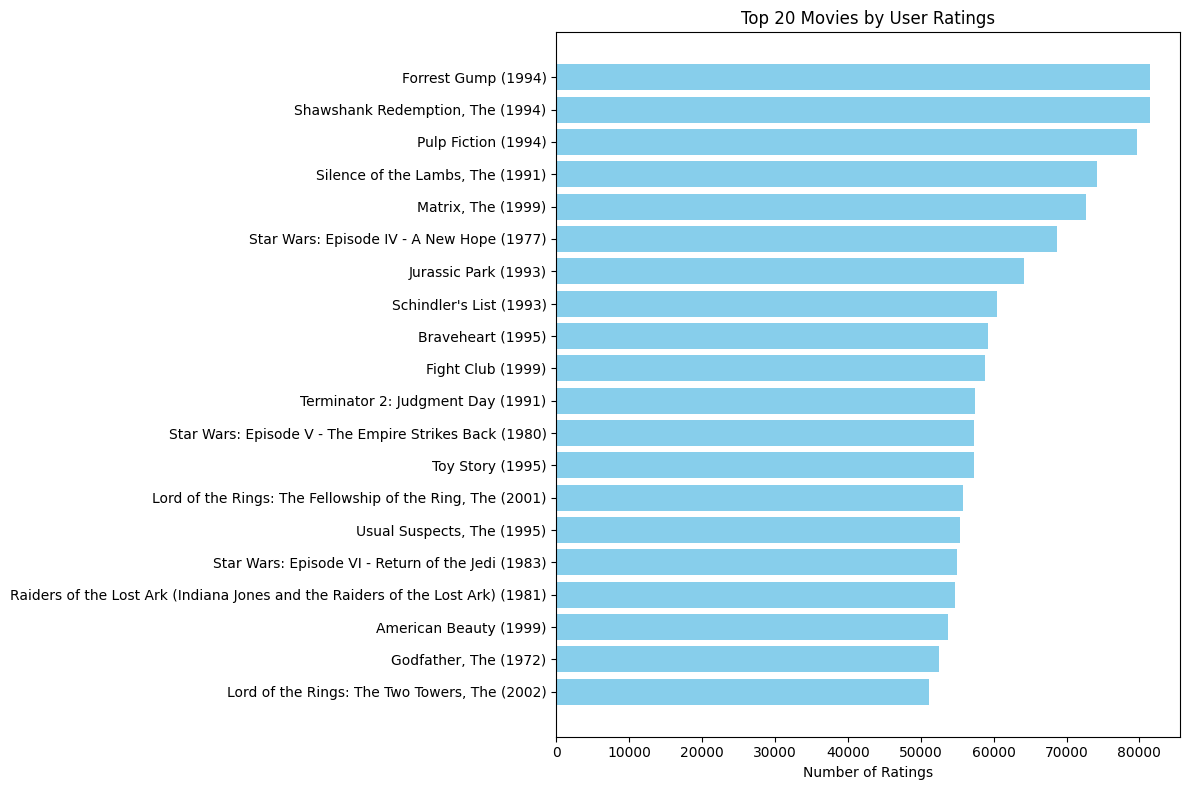

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/ratings.csv")

movie_ratings = ratings_df.groupby('movieId').agg({'userId': 'count', 'rating': 'mean'})

movies_df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/movies.csv")
top_movies = movies_df.merge(movie_ratings, left_on='movieId', right_index=True)

top_20_movies = top_movies.nlargest(20, ['userId', 'rating'])

top_20_movies = top_20_movies[['title', 'userId', 'rating']].reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.barh(top_20_movies['title'], top_20_movies['userId'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.title('Top 20 Movies by User Ratings')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.savefig('top_20_movies_bar_chart.png')

markdown_output = "# Top 20 Movies by User Ratings\n\n"
markdown_output += "Here are the top 20 movies based on the highest number of user ratings and highest ratings:\n\n"
markdown_output += "![Top 20 Movies Bar Chart](top_20_movies_bar_chart.png)\n\n"
markdown_output += "```\n"
markdown_output += str(top_20_movies)
markdown_output += "\n```\n"

with open("top_20_movies_analysis.md", "w") as file:
    file.write(markdown_output)

print("[Top 20 movies analysis](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/top_20_movies_analysis.md) completed. Markdown output saved successfully.")

**5. What is the most of popular season for releasing movies?**


Season-wise tag counts analysis completed. Markdown output saved as [season_tag_counts_analysis.md](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/season_tag_counts_analysis.md).


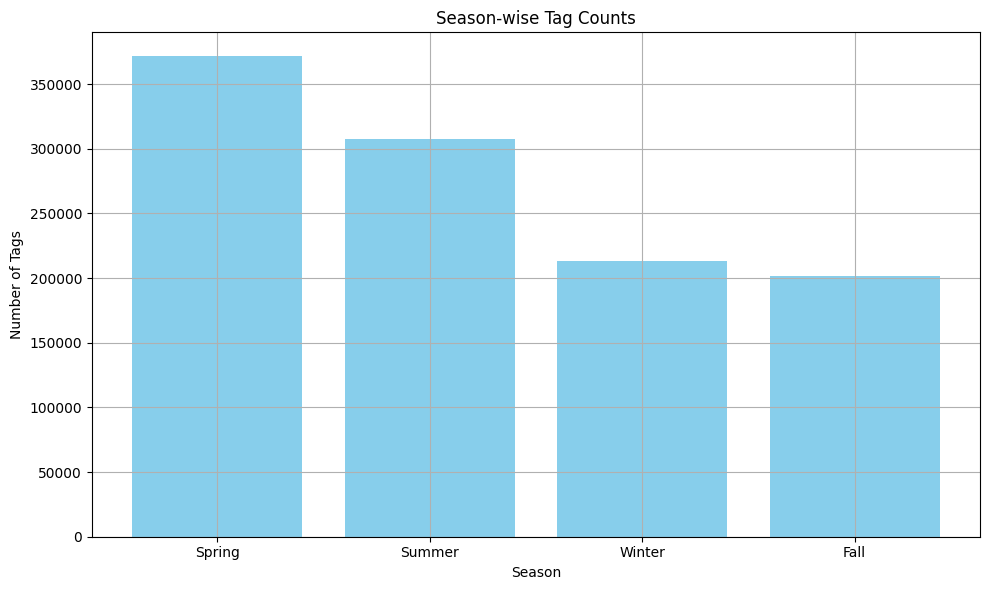

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/sa2-test-ii-datasets/tags.csv")

df['Release Month'] = pd.to_datetime(df['timestamp'], unit='s').dt.month

def categorize_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Season'] = df['Release Month'].apply(categorize_season)

season_counts = df['Season'].value_counts()

most_popular_season = season_counts.idxmax()
season_counts = season_counts.reset_index()
season_counts.columns = ['Season', 'Number of Tags']

plt.figure(figsize=(10, 6))
plt.bar(season_counts['Season'], season_counts['Number of Tags'], color='skyblue')
plt.title('Season-wise Tag Counts')
plt.xlabel('Season')
plt.ylabel('Number of Tags')
plt.grid(True)
plt.tight_layout()

plt.savefig('season_tag_counts_bar_chart.png')

markdown_output = "# Most Popular Season for Releasing Movies\n\n"
markdown_output += f"The most popular season for releasing movies based on tags is: **{most_popular_season}**.\n\n"
markdown_output += "## Season-wise Tag Counts\n\n"
markdown_output += "| Season | Number of Tags |\n"
markdown_output += "|--------|----------------|\n"
for idx, row in season_counts.iterrows():
    markdown_output += f"| {row['Season']} | {row['Number of Tags']} |\n"
markdown_output += "\n\n![Season-wise Tag Counts Bar Chart](season_tag_counts_bar_chart.png)\n\n"

with open("season_tag_counts_analysis.md", "w") as file:
    file.write(markdown_output)

print(f"\nSeason-wise tag counts analysis completed. Markdown output saved as [season_tag_counts_analysis.md](https://github.com/pywen1004/SA2_ARAGO-SANTIAGO/blob/main/season_tag_counts_analysis.md).")